In [13]:
# make a simple dataset
import numpy as np

x = np.arange(1, 10, step=0.1)
y = 5*x + 3 + np.random.randn(x.shape[0]) * 2

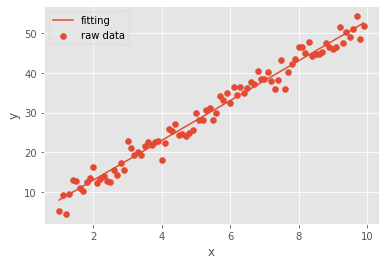

In [55]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.scatter(x, y, label="raw data")
plt.plot(x, y_pred2, label="fitting")
plt.legend()

plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [24]:
x = x[:, np.newaxis]

In [29]:
# create simple regression model from keras
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import SGD

In [31]:
# Create linear regression with functional api method
inputs = Input(shape=(1,), name="input_layer")
dense = Dense(1, use_bias=True, activation='linear', name='dense1', kernel_initializer='glorot_uniform')

outputs = dense(inputs)

model = Model(inputs, outputs, name='linear_regression')

model.summary()

Model: "linear_regression"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 1)]               0         
_________________________________________________________________
dense1 (Dense)               (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.get_weights()

[array([[-0.24371743]], dtype=float32), array([0.], dtype=float32)]

In [34]:
model.compile(loss="MSE", optimizer=SGD(learning_rate=1e-2))
model.fit(
    x=x,
    y=y,
    epochs=300,
    verbose=0
)

In [43]:
model.get_weights()[0]

array([[4.998892]], dtype=float32)

In [36]:
 y_pred = model.predict(x)

In [41]:
from sklearn.metrics import r2_score
r2 = r2_score(y, y_pred)
print(r2)

0.9768607277638617


In [47]:
# save model
model.save('./linear.h5')

In [50]:
# load weights
model.load_weights('./linear.h5')
# or more general, just load a model
from tensorflow.keras.models import load_model
reconstruct_model = load_model("linear.h5")

In [54]:
# check
y_pred2 = reconstruct_model.predict(x)